<a href="https://colab.research.google.com/github/Ingridpin/Analise_de_Dados_DataHackers-2022/blob/main/Regres%C3%A3o_linear_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_excel('/content/drive/MyDrive/Análise de Dados: Meus primeiros passos em python!/analise_dados_mod7_(1).xlsx')

In [ ]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [ ]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [ ]:
dados = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'] == 'Empregado (CLT)']

In [ ]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762


In [ ]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1805
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


In [ ]:
Lista_retirar = ['Prefiro não informar', 'Outra', 'Índigina']

In [ ]:
dados = dados[~dados['COR/RACA/ETNIA'].isin(Lista_retirar)]

In [ ]:
dados['NAO BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x != 'Branca' else 0)

<ipython-input-15-54f3469ce7c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['NAO BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x != 'Branca' else 0)


In [ ]:
dados['Quanto tempo de experiência na área de dados você tem?'].value_counts()

,count
Quanto tempo de experiência na área de dados você tem?,
de 1 a 2 anos,744
de 3 a 4 anos,584
de 4 a 6 anos,417
Menos de 1 ano,353
Mais de 10 anos,278
de 7 a 10 anos,233
Não tenho experiência na área de dados,127


In [ ]:
dados['TEMPO EXPERIENCIA'] = dados['Quanto tempo de experiência na área de dados você tem?'].str.extract(r'(\d+)')

<ipython-input-17-da8517ca9428>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['TEMPO EXPERIENCIA'] = dados['Quanto tempo de experiência na área de dados você tem?'].str.extract(r'(\d+)')


In [ ]:
dados ['TEMPO EXPERIENCIA'].value_counts()

,count
TEMPO EXPERIENCIA,
1,1097
3,584
4,417
10,278
7,233


In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1315
de 101 a 500,504
de 1.001 a 3.000,368
de 501 a 1.000,249
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [ ]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.', '')

<ipython-input-20-a9c97408ea8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.', '')


In [ ]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')

<ipython-input-21-de65999fa8a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')


In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)

,count
NUMERO DE FUNCIONARIOS,
3000,1315
101,504
1001,368
501,249
51,146
11,112
6,24
1,18


In [ ]:
dados['TEMPO EXPERIENCIA'] = dados['TEMPO EXPERIENCIA'].fillna(0)

<ipython-input-23-20c31f4d5d6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['TEMPO EXPERIENCIA'] = dados['TEMPO EXPERIENCIA'].fillna(0)


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 1 to 4270
Data columns (total 48 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   ID                                                                                                                         2736 non-null   object 
 1   IDADE                                                                                                                      2736 non-null   float64
 2   FAIXA IDADE                                                                                                                2736 non-null   object 
 3   GENERO                                                                                                                     2736 non-n

In [ ]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()

,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de maturidade analítica na empresa,46
Falta de oportunidade de crescimento no emprego atual,46
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",26
...,...
"O clima de trabalho/ambiente não é bom, Não tenho uma boa relação com meu líder/gestor, Gostaria de receber mais benefícios",1
Falta de organização nos processos internos,1
"Gostaria de receber mais benefícios, O clima de trabalho/ambiente não é bom, Falta de oportunidade de crescimento no emprego atual",1


In [ ]:
dados['INSATISFACAO'] = 0

<ipython-input-26-2a304eb088a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['INSATISFACAO'] = 0


In [ ]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

,Qual o principal motivo da sua insatisfação com a empresa atual?
1,0
2,0
7,1
10,0
26,1
...,...
4227,0
4234,1
4238,0
4240,1


In [ ]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'INSATISFACAO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

In [ ]:
dados['INSATISFACAO'].value_counts()

,count
INSATISFACAO,
0,2457
1,279


In [ ]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1026
Pós-graduação,977
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


In [ ]:
dados['NIVEL DE ENSINO'] = dados['NIVEL DE ENSINO'].apply(lambda x: 0 if x == 'Não tenho graduação formal'  else
                               1 if x == 'Estudante de graduação' else
                               2 if x == 'Graduação/Bacharelado' else
                               3 if x == 'Pós-graduação' else
                               4 if x == 'Mestrado' else
                               5 if x == 'Doutorado ou Phd' else -1)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 1 to 4270
Data columns (total 49 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   ID                                                                                                                         2736 non-null   object 
 1   IDADE                                                                                                                      2736 non-null   float64
 2   FAIXA IDADE                                                                                                                2736 non-null   object 
 3   GENERO                                                                                                                     2736 non-n

In [ ]:
dados = dados[['IDADE', 'GENERO', 'NAO BRANCA', 'TEMPO EXPERIENCIA', 'INSATISFACAO','SETOR',
      'REGIAO ONDE MORA', 'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL']]

In [ ]:
dados = pd.get_dummies(dados, columns = ['GENERO', 'SETOR', 'NOVO_NIVEL', 'REGIAO ONDE MORA'], drop_first=True)

In [ ]:
X = dados.drop('SALARIO', axis = 1)
y = dados['SALARIO']

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

25634129.590126693

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

3361.9185036886915

In [ ]:
import matplotlib.pyplot as plt

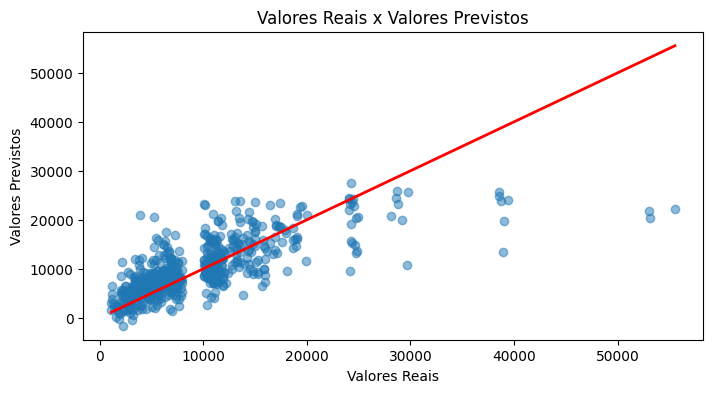

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais x Valores Previstos')
plt.plot((min(y_test), max(y_test)), (min(y_test), max(y_test)), color = 'red', linewidth = 2)
plt.show()

In [ ]:
nomes_dos_atributos = X_train.columns
nomes_dos_atributos

Index(['IDADE', 'NAO BRANCA', 'TEMPO EXPERIENCIA', 'INSATISFACAO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'NOVO_NIVEL_Pessoa Gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul'],
      dtype='object')

In [ ]:
coef = pd.DataFrame(model.coef_, columns = ['COEFICIENTES'], index = nomes_dos_atributos)

In [ ]:
coefs = coef.sort_values(by = 'COEFICIENTES', ascending = False)

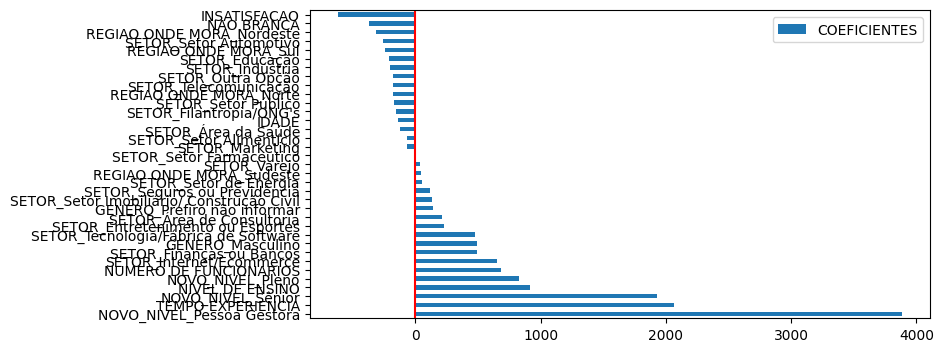

In [ ]:
coefs.plot.barh(figsize = (8, 4))
plt.axvline(x = 0, color = 'red')